# Titanic 

https://www.kaggle.com/saradpokleeb/titanic-machine-learning

Data Dictionary

Variable|Definition|Key
--------|----------|---
Survival|Survival|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sex|
Age|Age in years
sibsp|# of siblings / spouses aboard the Titanic|
parch|# of parents / children aboard the Titanic|
ticket|Ticket numer|
fare|Passenger fare|
cabin|Cabin number|
embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southamton


In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# 1. Data Preparation

In [40]:
train_df=pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
all_df = [train_df, test_df]

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
all_df

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [44]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [45]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Define if any null values

In [48]:
def missing_calc(df):
    num=df.isnull().sum().sort_values(ascending=False)
    num_1 = num[num>0]
    percentage=num_1/len(df)*100
    return pd.DataFrame({'total':num_1, 'percentage':percentage})
    

In [49]:
print('Missing Values as below: ')
missing_calc(test_df)

Missing Values as below: 


,total,percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


* 79% missing value for Cabin is high

In [50]:
print('Missing Values as below: ')
missing_calc(train_df)

Missing Values as below: 


,total,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


+ 77% missing value for Cabin is high

# 2. Data Cleaning

In [51]:
cabin_df = train_df[['Survived','Cabin']].copy()
cabin_df['Is_cabin']=cabin_df['Cabin'].notnull()

<AxesSubplot:>

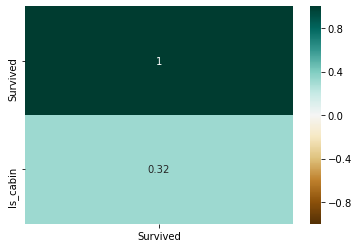

In [52]:
sns.heatmap(cabin_df.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1,vmax=1, annot=True, cmap='BrBG')

In [53]:
cabin_df

,Survived,Cabin,Is_cabin
0,0,NaN,False
1,1,C85,True
2,1,NaN,False
3,1,C123,True
4,0,NaN,False
...,...,...,...
886,0,NaN,False
887,1,B42,True
888,0,NaN,False
889,1,C148,True


* There has correlation for null rows

In [54]:
# Replace null value with 'N'

for df in all_df: 
    df['Cabin'] = cabin_df.Cabin.str[0] #set to 1 string only
    df.Cabin.fillna('N', inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [55]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,N,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,N,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,N,S


In [56]:
# Sparate the name of title for both df
for df in all_df:
    df['title']=train_df['Name'].str.split(".",expand=True)[0].str.split(',', expand=True)[1]


In [57]:
train_df['title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: title, Length: 891, dtype: object

In [58]:
test_df['title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
413       Mr
414       Mr
415      Mrs
416      Mrs
417     Miss
Name: title, Length: 418, dtype: object

In [59]:
train_df['title'].value_counts().to_frame()

,title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2
the Countess,1


In [60]:
#title with less than 10 will replace by 'uncommon'

common_title= train_df['title'].value_counts().loc[lambda x : x>10]

def title_convert(title):
    if title not in common_title:
        title='uncommon'
    else: 
        title=title
    return title

train_df.title = train_df.title.map(title_convert)
test_df.title = test_df.title.map(title_convert)



In [61]:
# Remove unessary column

train_df.drop(['PassengerId','Ticket','Name'],axis=1,inplace = True)

test_id = test_df[['PassengerId']].copy()
test_df.drop(['PassengerId','Ticket','Name'],axis=1,inplace = True)

In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
0,0,3,male,22.0,1,0,7.2500,N,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,N,S,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs
4,0,3,male,35.0,0,0,8.0500,N,S,Mr


In [63]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
886,0,2,male,27.0,0,0,13.00,N,S,uncommon
887,1,1,female,19.0,0,0,30.00,B,S,Miss
888,0,3,female,NaN,1,2,23.45,N,S,Miss
889,1,1,male,26.0,0,0,30.00,C,C,Mr
890,0,3,male,32.0,0,0,7.75,N,Q,Mr


# 3. Pre-Modelling

In [64]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [65]:
# Split dataframe to train and test.
from sklearn.model_selection import train_test_split
# Drop Survived data in dataframe x_data
X = train_df.drop(['Survived'],axis = 1)
# place the target data Survived in a separate dataframe y_data:
y = train_df['Survived']

# testing set is 30% of the total dataset (0.30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state= 0 )
print('X_train size :',X_train.shape ,', X_test size :',X_test.shape)

X_train size : (623, 9) , X_test size : (268, 9)


In [66]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
857,1,male,51.0,0,0,26.5500,E,S,Mr
52,1,female,49.0,1,0,76.7292,D,C,Mrs
386,3,male,1.0,5,2,46.9000,N,S,Master
124,1,male,54.0,0,1,77.2875,D,S,Mr
578,3,female,NaN,1,0,14.4583,N,C,Mrs


### Encode Category Data (Sex, Cabin, Embarked, Title)

In [67]:
cat_attribs = ['Sex','Cabin','Embarked','title']

cat_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

### Feature Scaling (Numerical Columns)

In [68]:
num_attribs = ['Age','SibSp', 'Parch', 'Fare']

# SimpleImputer -- impute those missing values masked as NaN and fill them with ‘median’
# StandardScaler -- removes the mean and scales each feature/variable to unit variance.
num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('std_scaler',StandardScaler())
])